In [3]:
import torch
from torch.utils.data import dataset,dataloader
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision as tv

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [4]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load the pretrained Inception v3 model_inception
model_inception = models.inception_v3(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_inception.to(device)
# Disable auxiliary logits for inference
model_inception.aux_logits = False
model_inception.eval()  # set model_inception to evaluation mode

# Define the preprocessing transforms.
# Inception v3 expects 299x299 input images.
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
from scipy.io import loadmat
from torchvision.models import Inception_V3_Weights
weights = Inception_V3_Weights.DEFAULT


# Load the .mat file
data = loadmat('../dataset/car_devkit/devkit/cars_train_annos.mat')


img_dir = '../dataset/sports_car'
filenames = [os.path.join(img_dir, fname) 
                          for fname in os.listdir(img_dir) 
                          if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

# indices = np.random.randint(0,len(filenames),64)
print(filenames)

X = []
Y = {}
dominant_colors = []
results = []
centres = []
counts = []
for i in range(64):
    # Open the image using PIL
    try :
        image = Image.open(filenames[i])
        
        # Extract the index and annotation values (adjust this to your data format)
        # index = int(filenames[i].split('/')[-1].split('.')[0])
        # annot = data['annotations'][0][index-1]
        # x1 = int(annot[0][0])
        # y1 = int(annot[1][0])
        # x2 = int(annot[2][0])
        # y2 = int(annot[3][0])
        
        # cropped_img = image.crop((x1, y1, x2, y2))
        
        # This section aims to find the images from teh dataset that have same label assigned by inception v3
        # input_tensor = preprocess(image).to(device).unsqueeze(0)
        # prediction = model_inception(input_tensor).detach()
        
        # ans = torch.topk(prediction,1)[1][0][0]
        # print(ans)
        # print(weights.meta['categories'][ans])
        X.append(image)
        # if ans == 817:
        #     name = filenames[i].split('/')[-1]
        #     cropped_img.save(f'../dataset/sports_car/{name}')
    except Exception as e:
        print(e)
    
    
    
    
    
    # X.append(cropped_img)

['../dataset/sports_car/01940.jpg', '../dataset/sports_car/00204.jpg', '../dataset/sports_car/01907.jpg', '../dataset/sports_car/02389.jpg', '../dataset/sports_car/01062.jpg', '../dataset/sports_car/03973.jpg', '../dataset/sports_car/05337.jpg', '../dataset/sports_car/00694.jpg', '../dataset/sports_car/00606.jpg', '../dataset/sports_car/06198.jpg', '../dataset/sports_car/06314.jpg', '../dataset/sports_car/01090.jpg', '../dataset/sports_car/05553.jpg', '../dataset/sports_car/02538.jpg', '../dataset/sports_car/03867.jpg', '../dataset/sports_car/03499.jpg', '../dataset/sports_car/02937.jpg', '../dataset/sports_car/06984.jpg', '../dataset/sports_car/05181.jpg', '../dataset/sports_car/02296.jpg', '../dataset/sports_car/01021.jpg', '../dataset/sports_car/04537.jpg', '../dataset/sports_car/02267.jpg', '../dataset/sports_car/00341.jpg', '../dataset/sports_car/05475.jpg', '../dataset/sports_car/01848.jpg', '../dataset/sports_car/00316.jpg', '../dataset/sports_car/04931.jpg', '../dataset/sports_

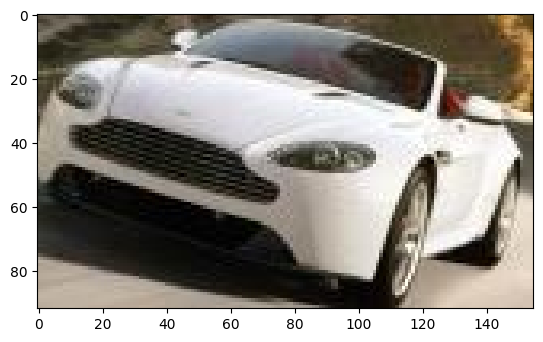

In [6]:
plt.imshow(X[52])

/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


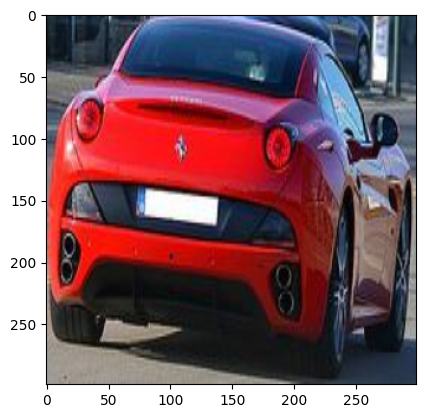

Step 0: Total Loss = 0.6665226221084595, Style Loss = 6.524616765091196e-06, Content Loss = 0.014060981571674347


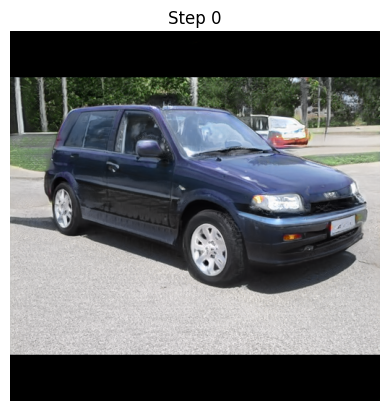

Step 100: Total Loss = 0.04794270545244217, Style Loss = 3.5009429666388314e-07, Content Loss = 0.01293327659368515


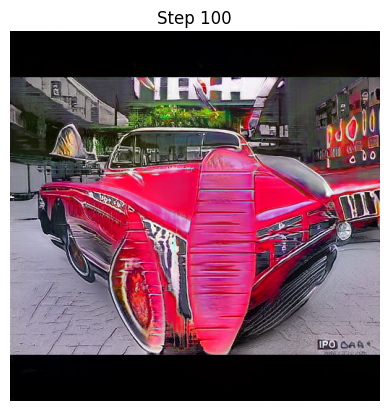

Step 200: Total Loss = 0.039012592285871506, Style Loss = 2.548272561853082e-07, Content Loss = 0.013529866002500057


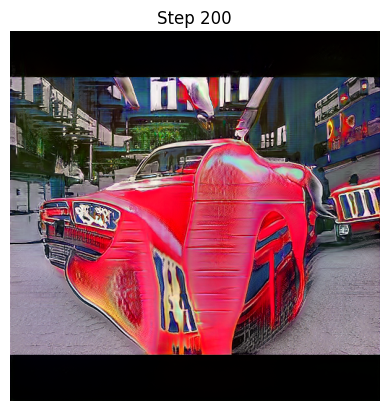

Step 300: Total Loss = 0.03633426874876022, Style Loss = 2.3340464849752607e-07, Content Loss = 0.012993802316486835


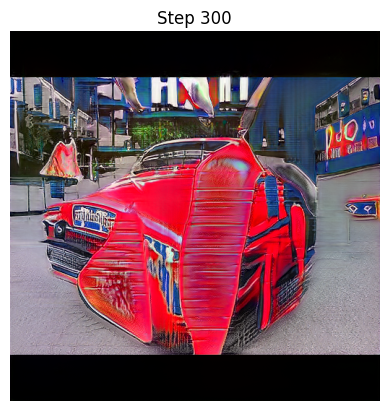

Step 400: Total Loss = 0.038619644939899445, Style Loss = 2.604213875656569e-07, Content Loss = 0.012577504850924015


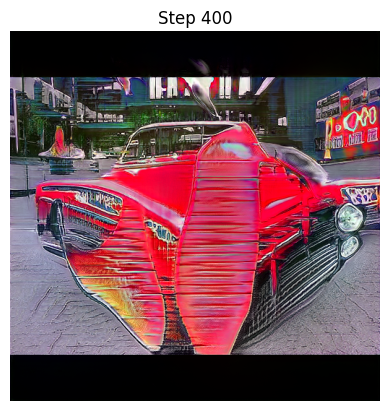

Step 500: Total Loss = 0.04236120730638504, Style Loss = 2.921424595569988e-07, Content Loss = 0.013146959245204926


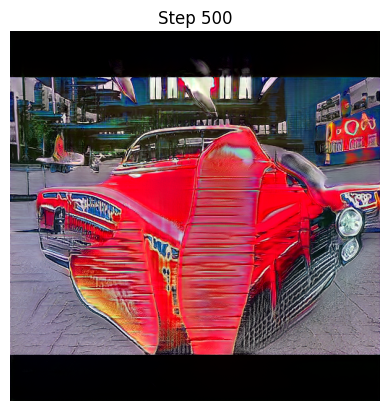

Step 600: Total Loss = 0.03628132864832878, Style Loss = 2.2982246150604624e-07, Content Loss = 0.013299082405865192


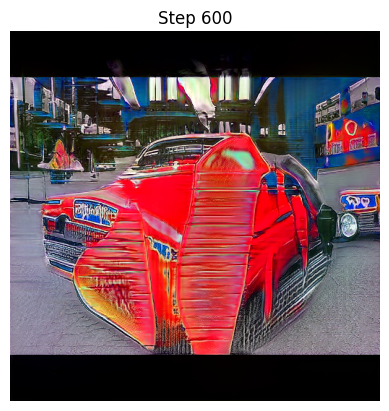

Step 700: Total Loss = 0.03352314606308937, Style Loss = 2.0762300323440286e-07, Content Loss = 0.012760845012962818


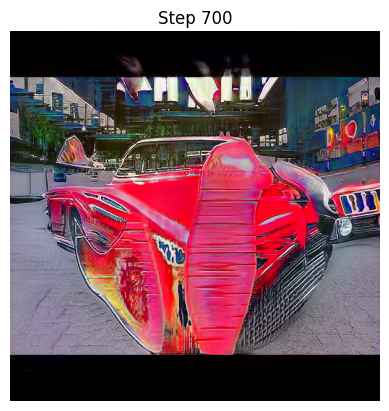

Step 800: Total Loss = 0.03261713683605194, Style Loss = 2.020520923906588e-07, Content Loss = 0.012411926873028278


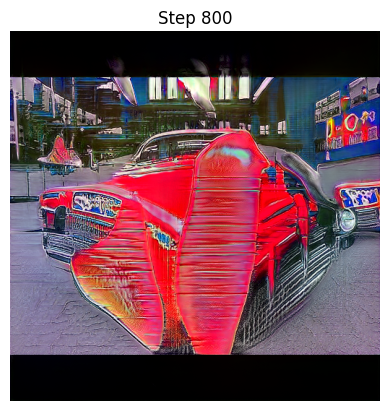

Step 900: Total Loss = 0.032638221979141235, Style Loss = 1.9234695969316817e-07, Content Loss = 0.013403527438640594


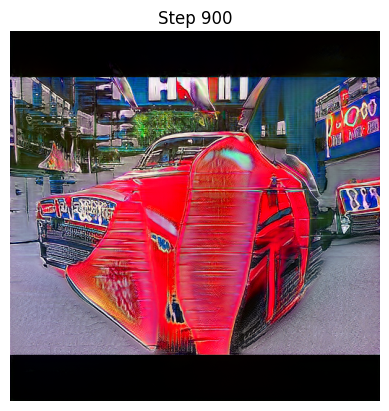

Step 1000: Total Loss = 0.0324886292219162, Style Loss = 1.976991086394264e-07, Content Loss = 0.01271871943026781


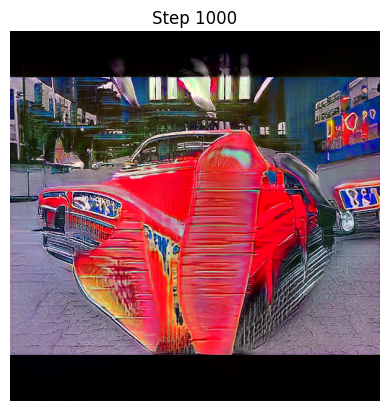

Step 1100: Total Loss = 0.0327516607940197, Style Loss = 1.9471075063393073e-07, Content Loss = 0.01328058447688818


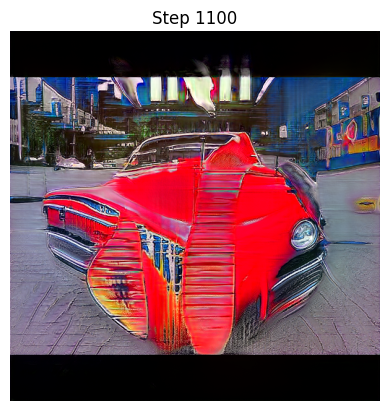

Step 1200: Total Loss = 0.03142855688929558, Style Loss = 1.829553184506949e-07, Content Loss = 0.013133024796843529


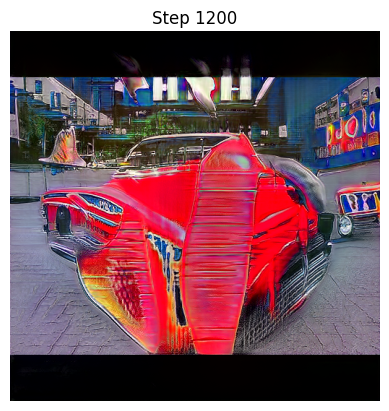

Step 1300: Total Loss = 0.03176393359899521, Style Loss = 1.906060163037182e-07, Content Loss = 0.012703330256044865


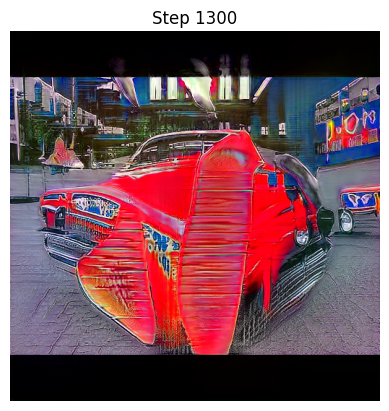

KeyboardInterrupt: 

In [8]:

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import matplotlib.pyplot as plt
import dnnlib
import legacy
from torchvision.utils import save_image
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

network_pkl = "http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-car-config-e.pkl"
with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)
G.eval()
for param in G.parameters():
    param.requires_grad = False

inception = models.inception_v3(pretrained=True).to(device)
inception.eval()
for param in inception.parameters():
    param.requires_grad = False

class CustomLatentGenerator(nn.Module):
    def __init__(self, input_dim=512, output_dim=512):
        super(CustomLatentGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, output_dim)
        )
    def forward(self, x):
        return self.model(x)

custom_gen = CustomLatentGenerator().to(device)
# optimizer = optim.Adam(custom_gen.parameters(), lr=1e-3, weight_decay=1e-5)
optimizer = optim.Adam(custom_gen.parameters(), lr=1e-4)


preprocess1 = T.Compose([T.Resize((299, 299))])
preprocess = T.Compose([T.Resize((299,299)), T.ToTensor()])

def layer_activation(model, input_tensor, layer_name, detach_output=True):
    model.eval()
    activations = {}
    def get_activation(name):
        def hook(module, input, output):
            activations[name] = output if not detach_output else output.detach()
        return hook
    target_module = None
    for name, module in model.named_modules():
        if name == layer_name:
            target_module = module
            break
    if target_module is None:
        raise ValueError(f"Layer '{layer_name}' not found in the model.")
    hook_handle = target_module.register_forward_hook(get_activation(layer_name))
    _ = model(input_tensor)
    hook_handle.remove()
    return activations[layer_name]

def gram_matrix(features):
    b, c, h, w = features.size()
    features = features.view(b, c, h * w)
    gram = torch.bmm(features, features.transpose(1, 2))
    return gram / (c * h * w)

def content_loss(content_target, content_generated):
    return F.mse_loss(content_generated, content_target)

selected_layers_style = ['Conv2d_1a_3x3', 'Mixed_5c', 'Mixed_6e']

selected_layers_content = ['Conv2d_1a_3x3', 'Mixed_5c', 'Mixed_6e']


# target_image = X[22]

target_tensor = preprocess(X[31]).unsqueeze(0).to(device)
plt.imshow(target_tensor.cpu().squeeze().permute(1,2,0))
plt.show()

style_features_target = []
content_features_target = []
for layer in selected_layers_style:
    style_features_target.append(layer_activation(inception, target_tensor, layer))
  
for layer in selected_layers_content:  
    content_features_target.append(layer_activation(inception, target_tensor, layer))

num_steps = 10000
for step in range(num_steps):
    optimizer.zero_grad()
    
    z = torch.randn([1, 512]).to(device)
    z_mod = custom_gen(z)
    
    w = G.mapping(z_mod, None)
    
    img = G.synthesis(w, noise_mode='const')
    img = (img.clamp(-1, 1) + 1) / 2
    img_inp = preprocess1(img.squeeze(0)).unsqueeze(0)
    
    
    style_features_gen = []
    content_features_gen = []
    for layer in selected_layers_style:
        feat = layer_activation(inception, img_inp, layer, detach_output=False)
        style_features_gen.append(feat)
        
    for layer in selected_layers_content:
        feat = layer_activation(inception, img_inp, layer, detach_output=False)
        content_features_gen.append(feat)
    
    
    style_loss_total = 0
    for gen_feat, target_feat in zip(style_features_gen, style_features_target):
        gram_gen = gram_matrix(gen_feat)
        gram_target = gram_matrix(target_feat)
        style_loss_total += F.mse_loss(gram_gen, gram_target)
        
        
    content_loss_val = content_loss(content_features_gen[0], content_features_target[0])
    # total_loss = 1e5*style_loss_total + content_loss_val
    total_loss = content_loss_val + 1e5* style_loss_total
    
    total_loss.backward()
    optimizer.step()
    
    if step % 100 == 0:
        torch.save(custom_gen.state_dict(), "custom_latent_generator.pth")
        print(f"Step {step}: Total Loss = {total_loss.item()}, Style Loss = {style_loss_total.item()}, Content Loss = {content_loss_val.item()}")
        plt.imshow(img.detach().cpu().squeeze().permute(1, 2, 0))
        plt.title(f"Step {step}")
        plt.axis('off')
        plt.show()


/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


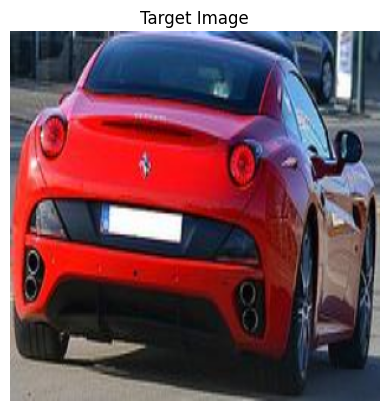

Step 0: Total Loss = 1658.89794921875, Style Loss = 4.295364760764642e-06, Content Loss = 0.012293614447116852, KL Loss = 0.048622146248817444


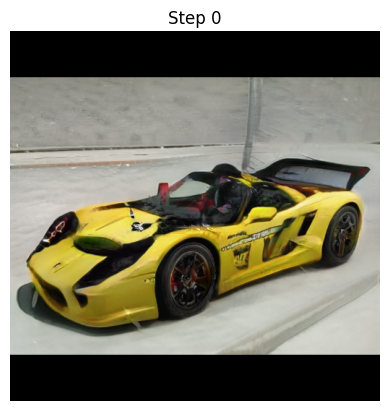

Step 100: Total Loss = 1317.1396484375, Style Loss = 2.0025820504088188e-06, Content Loss = 0.011168815195560455, KL Loss = 0.03928505629301071


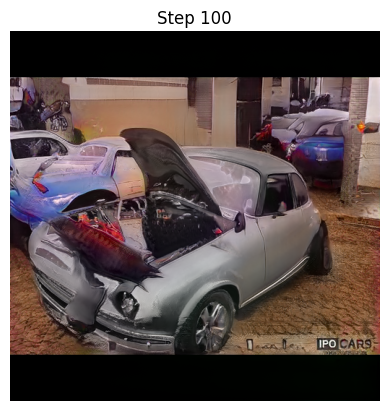

Step 200: Total Loss = 1080.8408203125, Style Loss = 1.1982018577327835e-06, Content Loss = 0.009610206820070744, KL Loss = 0.05204062536358833


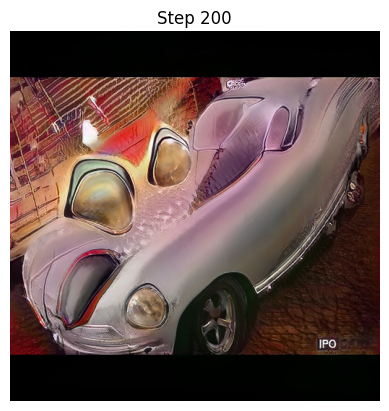

KeyboardInterrupt: 

In [40]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import matplotlib.pyplot as plt
import dnnlib
import legacy
from torchvision.utils import save_image
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the StyleGAN2 network
network_pkl = "http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-car-config-e.pkl"
with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)
G.eval()
for param in G.parameters():
    param.requires_grad = False

# Load the Inception V3 network for feature extraction
inception = models.inception_v3(pretrained=True).to(device)
inception.eval()
for param in inception.parameters():
    param.requires_grad = False

# Define the VAE for latent space
class LatentVAE(nn.Module):
    def __init__(self, input_dim=512, hidden_dim=512, latent_dim=512):
        super(LatentVAE, self).__init__()
        # Encoder: maps input latent vector to a hidden representation, then to mu and logvar.
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        # Decoder: maps sampled latent back to a latent vector for StyleGAN2.
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim, input_dim)
        )
    
    def encode(self, x):
        h = F.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar

# Instantiate the VAE and its optimizer
latent_vae = LatentVAE().to(device)
optimizer = optim.Adam(latent_vae.parameters(), lr=1e-4)

# Preprocessing transforms for Inception
preprocess1 = T.Compose([T.Resize((299, 299))])
preprocess = T.Compose([T.Resize((299,299)), T.ToTensor()])

def layer_activation(model, input_tensor, layer_name, detach_output=True):
    """Extract the activation from a specific layer of a given model."""
    model.eval()
    activations = {}
    def get_activation(name):
        def hook(module, input, output):
            activations[name] = output if not detach_output else output.detach()
        return hook
    target_module = None
    for name, module in model.named_modules():
        if name == layer_name:
            target_module = module
            break
    if target_module is None:
        raise ValueError(f"Layer '{layer_name}' not found in the model.")
    hook_handle = target_module.register_forward_hook(get_activation(layer_name))
    _ = model(input_tensor)
    hook_handle.remove()
    return activations[layer_name]

def gram_matrix(features):
    """Compute the Gram matrix for a given set of features."""
    b, c, h, w = features.size()
    features = features.view(b, c, h * w)
    gram = torch.bmm(features, features.transpose(1, 2))
    return gram / (c * h * w)

def content_loss(content_target, content_generated):
    return F.mse_loss(content_generated, content_target)

# Define the layers to extract style and content features
selected_layers_style = ['Conv2d_1a_3x3', 'Mixed_5c', 'Mixed_6e']
selected_layers_content = ['Conv2d_1a_3x3', 'Mixed_5c', 'Mixed_6e']

# ---------------------------------------------------------------------
# Set the target image from your dataset (assumes X is defined elsewhere)
target_tensor = preprocess(X[31]).unsqueeze(0).to(device)
plt.imshow(target_tensor.cpu().squeeze().permute(1,2,0))
plt.title("Target Image")
plt.axis('off')
plt.show()

# Extract features from the target image
style_features_target = []
content_features_target = []
for layer in selected_layers_style:
    style_features_target.append(layer_activation(inception, target_tensor, layer))
for layer in selected_layers_content:  
    content_features_target.append(layer_activation(inception, target_tensor, layer))

# Training loop parameters
num_steps = 10000
kl_weight = 1e-3  # Weight for the KL divergence loss

for step in range(num_steps):
    optimizer.zero_grad()
    
    # Sample a random latent vector as input to the VAE
    z = torch.randn([1, 512]).to(device)
    # Pass through the VAE: get the decoded latent, along with mu and logvar for KL loss
    z_mod, mu, logvar = latent_vae(z)
    
    # Map the latent vector using StyleGAN2's mapping network
    w = G.mapping(z_mod, None)
    
    # Synthesize an image from the latent vector
    img = G.synthesis(w, noise_mode='const')
    img = (img.clamp(-1, 1) + 1) / 2  # Normalize image to [0, 1]
    img_inp = preprocess1(img.squeeze(0)).unsqueeze(0)
    
    # Extract style and content features from the generated image
    style_features_gen = []
    content_features_gen = []
    for layer in selected_layers_style:
        feat = layer_activation(inception, img_inp, layer, detach_output=False)
        style_features_gen.append(feat)
    for layer in selected_layers_content:
        feat = layer_activation(inception, img_inp, layer, detach_output=False)
        content_features_gen.append(feat)
    
    # Compute style loss using the Gram matrices
    style_loss_total = 0
    for gen_feat, target_feat in zip(style_features_gen, style_features_target):
        gram_gen = gram_matrix(gen_feat)
        gram_target = gram_matrix(target_feat)
        style_loss_total += F.mse_loss(gram_gen, gram_target)
        
    # Compute content loss (here, comparing only the first selected layer)
    content_loss_val = content_loss(content_features_gen[0], content_features_target[0])
    
    # Compute the KL divergence loss for the VAE
    kl_loss = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
    
    # Total loss: combine content loss, a weighted style loss, and the KL divergence loss
    total_loss = 1e5*content_loss_val + 1e8 * style_loss_total + kl_weight * kl_loss
    
    total_loss.backward()
    optimizer.step()
    
    if step % 100 == 0:
        # Save the VAE state
        torch.save(latent_vae.state_dict(), "latent_vae.pth")
        print(f"Step {step}: Total Loss = {total_loss.item()}, "
              f"Style Loss = {style_loss_total.item()}, "
              f"Content Loss = {content_loss_val.item()}, "
              f"KL Loss = {kl_loss.item()}")
        plt.imshow(img.detach().cpu().squeeze().permute(1, 2, 0))
        plt.title(f"Step {step}")
        plt.axis('off')
        plt.show()


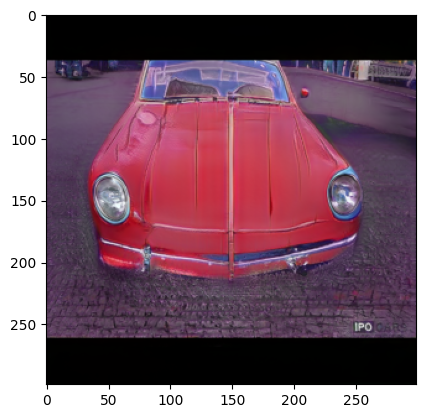

In [38]:
# Sample a random latent vector as input to the VAE
z = torch.randn([1, 512]).to(device)
# Pass through the VAE: get the decoded latent, along with mu and logvar for KL loss
z_mod, mu, logvar = latent_vae(z)

# Map the latent vector using StyleGAN2's mapping network
w = G.mapping(z_mod, None)

# Synthesize an image from the latent vector
img = G.synthesis(w, noise_mode='const')
img = (img.clamp(-1, 1) + 1) / 2  # Normalize image to [0, 1]
img_inp = preprocess1(img.squeeze(0)).unsqueeze(0)
plt.imshow(img_inp.squeeze().detach().cpu().permute(1,2,0))
plt.show()